In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

import pickle

# Load prepared data

In [164]:
dir_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/"
# dir_path = "/Users/mriworkshop/Documents/TDCS/code/tdcs_thesis/"
save_path = dir_path+"data/raw/"
img_path =  dir_path+"data/processed/"
model_path = dir_path+"models/"

## fmap mean all experiments

In [3]:
# 5 attributes
file_mean = save_path+"fmap_mean_erode.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [4]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5046267,35,5,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
5046268,35,5,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
5046269,35,5,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
5046270,35,5,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
# 3 attributes
file_mean = save_path+"fmap_mean_erode_amp_32to39.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'amp', 'neg','mean0', 'mean1', 'mean2', 'theory']
data = np.loadtxt(file_mean);

In [166]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int, "neg": int, "amp":int})
df

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
0,36,1,0,0,0,2,0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,2,0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,2,0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,2,0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,2,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12255227,39,6,43,63,59,1,1,0.0,0.0,0.0,0.0
12255228,39,6,43,63,60,1,1,0.0,0.0,0.0,0.0
12255229,39,6,43,63,61,1,1,0.0,0.0,0.0,0.0
12255230,39,6,43,63,62,1,1,0.0,0.0,0.0,0.0


In [167]:
# Exclude bad data
df = df[(df['exp'] != 34) & (df['exp'] != 39)]
df = df[~((df['exp'] == 37) & (df['mini_exp'] == 2))]
df = df[~((df['exp'] == 35) & (df['mini_exp'] == 1))]
df = df[~((df['exp'] == 32) & (df['mini_exp'] == 2))]

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8650752 entries, 0 to 10092543
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   amp       int64  
 6   neg       int64  
 7   mean0     float64
 8   mean1     float64
 9   mean2     float64
 10  theory    float64
dtypes: float64(4), int64(7)
memory usage: 792.0 MB


In [234]:
df[(df['i']==30)&(df['j']==32)&(df['k']==40)]

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
124968,36,1,30,32,40,2,0,-50.925091,-59.834545,-92.839706,10.187326
305192,36,1,30,32,40,2,1,-92.839706,-126.139351,-129.944748,-10.187326
485416,36,2,30,32,40,2,0,-139.171356,-144.143845,-172.962448,10.187326
665640,36,2,30,32,40,2,1,-172.962448,-200.107834,-200.442368,-10.187326
845864,36,3,30,32,40,2,0,-206.371307,-209.107529,-233.967285,10.187326
1026088,36,3,30,32,40,2,1,-233.967285,-258.700684,-256.091278,-10.187326
1206312,36,4,30,32,40,2,0,-261.492462,-262.129028,-285.729187,10.187326
1386536,36,4,30,32,40,2,1,-285.729187,-307.017517,-302.637451,-10.187326
1566760,36,5,30,32,40,2,0,-307.916351,-305.426544,-327.901337,10.187326
1746984,36,5,30,32,40,2,1,-327.901337,-346.574646,-341.432831,-10.187326


# Split data

## Data 1. fmap mean all experiments

In [170]:
df1_train = df[~((df['exp']==36) & ((df['mini_exp']==5) | (df['mini_exp']==6)))]
df1_val =  df[(df['exp']==36) & (df['mini_exp']==5)]
df1_test1 =  df[(df['exp']==36) & (df['mini_exp']==6) & (df['neg']==1)]
df1_test2 =  df[(df['exp']==36) & (df['mini_exp']==6) & (df['neg']==0)]

In [172]:
df1_test2

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
1802240,36,6,0,0,0,2,0,0.0,0.0,0.0,0.0
1802241,36,6,0,0,1,2,0,0.0,0.0,0.0,0.0
1802242,36,6,0,0,2,2,0,0.0,0.0,0.0,0.0
1802243,36,6,0,0,3,2,0,0.0,0.0,0.0,0.0
1802244,36,6,0,0,4,2,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1982459,36,6,43,63,59,2,0,0.0,0.0,0.0,0.0
1982460,36,6,43,63,60,2,0,0.0,0.0,0.0,0.0
1982461,36,6,43,63,61,2,0,0.0,0.0,0.0,0.0
1982462,36,6,43,63,62,2,0,0.0,0.0,0.0,0.0


In [173]:
print(df1_train.shape)
print(df1_val.shape)
print(df1_test1.shape)
print(df1_test2.shape)

(7929856, 11)
(360448, 11)
(180224, 11)
(180224, 11)


In [174]:
df1_train.iloc[:, 7:-1]

,mean0,mean1,mean2
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
10092539,0.0,0.0,0.0
10092540,0.0,0.0,0.0
10092541,0.0,0.0,0.0
10092542,0.0,0.0,0.0


In [175]:
X1_train = df1_train.iloc[:, 7:-1].values 
y1_train = df1_train['theory'].values

X1_test = df1_val.iloc[:, 7:-1].values 
y1_test = df1_val['theory'].values

X1_pred1 = df1_test1.iloc[:, 7:-1].values 
y1_pred1 = df1_test1['theory'].values

X1_pred2 = df1_test2.iloc[:, 7:-1].values 
y1_pred2 = df1_test2['theory'].values

In [176]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)
print(X1_pred1.shape)
print(y1_pred1.shape)
print(X1_pred2.shape)
print(y1_pred2.shape)

(7929856, 3)
(7929856,)
(360448, 3)
(360448,)
(180224, 3)
(180224,)
(180224, 3)
(180224,)


## Data2: One experiment

In [40]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

## Data4: None zero

In [41]:
# 5 attributes
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0) & (df['mean3']!=0.0) & (df['mean4']!=0.0)]

In [202]:
# 3 attributes
df_nonzero = df[(df['mean0']!=0.0) & (df['mean1']!=0.0) & (df['mean2']!=0.0)]

In [203]:
df_nonzero

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
34920,36,1,8,33,40,2,0,17.758072,3.100749,-27.108955,6.323732
34921,36,1,8,33,41,2,0,-171.797119,-187.157349,-216.839035,5.692159
34922,36,1,8,33,42,2,0,-384.395447,-400.023895,-428.779266,5.156662
34923,36,1,8,33,43,2,0,-597.038513,-613.454895,-641.396118,4.694756
34959,36,1,8,34,15,2,0,-1179.840454,-1197.678955,-1222.885254,3.883065
...,...,...,...,...,...,...,...,...,...,...,...
10050081,35,5,33,40,33,2,1,-219.398911,-222.292938,-216.633850,-20.445215
10050082,35,5,33,40,34,2,1,-236.275848,-238.081451,-233.357391,-15.309294
10050083,35,5,33,40,35,2,1,-217.110458,-218.660629,-214.294983,-12.231406
10050084,35,5,33,40,36,2,1,-173.302063,-174.678192,-170.903381,-10.196120


In [204]:
df4_train = df_nonzero[~((df_nonzero['exp']==36) & ((df_nonzero['mini_exp']==6) | (df_nonzero['mini_exp']==5)))]
df4_test =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==5)]
df4_pred1 =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6) & (df_nonzero['neg']==1)]
df4_pred2 =  df_nonzero[(df_nonzero['exp']==36) & (df_nonzero['mini_exp']==6) & (df_nonzero['neg']==0)]

In [205]:
df4_pred2

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory
1837160,36,6,8,33,40,2,0,-281.228516,-281.580200,-298.687897,6.323732
1837161,36,6,8,33,41,2,0,-470.337860,-472.075500,-488.780823,5.692159
1837162,36,6,8,33,42,2,0,-681.214478,-683.935608,-700.522400,5.156662
1837163,36,6,8,33,43,2,0,-892.559753,-896.184509,-911.637207,4.694756
1837199,36,6,8,34,15,2,0,-1471.209351,-1475.378540,-1489.757202,3.883065
...,...,...,...,...,...,...,...,...,...,...,...
1947924,36,6,35,36,20,2,0,-610.252991,-613.019775,-628.576294,6.022675
1947925,36,6,35,36,21,2,0,-460.002319,-461.472900,-478.441254,6.719324
1947926,36,6,35,36,22,2,0,-321.722260,-321.674591,-340.263275,7.573551
1947927,36,6,35,36,23,2,0,-196.516602,-195.509140,-214.553329,8.658540


In [206]:
df4_train.iloc[:, 7:-1]

,mean0,mean1,mean2
34920,17.758072,3.100749,-27.108955
34921,-171.797119,-187.157349,-216.839035
34922,-384.395447,-400.023895,-428.779266
34923,-597.038513,-613.454895,-641.396118
34959,-1179.840454,-1197.678955,-1222.885254
...,...,...,...
10050081,-219.398911,-222.292938,-216.633850
10050082,-236.275848,-238.081451,-233.357391
10050083,-217.110458,-218.660629,-214.294983
10050084,-173.302063,-174.678192,-170.903381


In [207]:
X4_train = df4_train.iloc[:, 7:-1].values
y4_train = df4_train['theory'].values

X4_test = df4_test.iloc[:, 7:-1].values
y4_test = df4_test['theory'].values

X4_pred1 = df4_pred1.iloc[:, 7:-1].values
y4_pred1 = df4_pred1['theory'].values
X4_pred2 = df4_pred2.iloc[:, 7:-1].values
y4_pred2 = df4_pred2['theory'].values

In [25]:
# X = df_nonzero.iloc[:, 5:-1].values
# y = df_nonzero['theory'].values

# X4_train, X4_test, y4_train, y4_test = train_test_split(
#     X, y, test_size=0.3, random_state=0)

In [208]:
# print(X.shape)
# print(y.shape)
print(X4_train.shape)
print(y4_train.shape)
print(X4_test.shape)
print(y4_test.shape)
print(X4_pred1.shape)
print(y4_pred1.shape)
print(X4_pred2.shape)
print(y4_pred2.shape)

(1176778, 3)
(1176778,)
(54187, 3)
(54187,)
(27096, 3)
(27096,)
(27093, 3)
(27093,)


# Include zero 32 to 38

In [10]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [11]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(7, activation='relu', input_shape=shape)) 
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["mean_absolute_error"])

2022-12-11 15:26:45.334359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [78]:
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=[X_test, y_test])

Epoch 1/100
18304/18304 [==============================] - 25s 1ms/step - loss: 6.3162 - mean_absolute_error: 0.5695 - val_loss: 2.9272 - val_mean_absolute_error: 0.4882
Epoch 2/100
18304/18304 [==============================] - 24s 1ms/step - loss: 4.6128 - mean_absolute_error: 0.4872 - val_loss: 2.1374 - val_mean_absolute_error: 0.4095
Epoch 3/100
18304/18304 [==============================] - 24s 1ms/step - loss: 4.3219 - mean_absolute_error: 0.4646 - val_loss: 2.4087 - val_mean_absolute_error: 0.4113
Epoch 4/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.2663 - mean_absolute_error: 0.4621 - val_loss: 1.7181 - val_mean_absolute_error: 0.4085
Epoch 5/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.3146 - mean_absolute_error: 0.4647 - val_loss: 1.6382 - val_mean_absolute_error: 0.4110
Epoch 6/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.2310 - mean_absolute_error: 0.4778 - val_loss: 1.6481 - val_mean_abs

Epoch 49/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.7479 - mean_absolute_error: 0.4864 - val_loss: 3.3143 - val_mean_absolute_error: 0.5741
Epoch 50/100
18304/18304 [==============================] - 23s 1ms/step - loss: 4.0356 - mean_absolute_error: 0.4870 - val_loss: 1.4743 - val_mean_absolute_error: 0.4125
Epoch 51/100
18304/18304 [==============================] - 24s 1ms/step - loss: 4.4627 - mean_absolute_error: 0.4892 - val_loss: 1.9630 - val_mean_absolute_error: 0.4855
Epoch 52/100
18304/18304 [==============================] - 24s 1ms/step - loss: 4.1965 - mean_absolute_error: 0.4865 - val_loss: 2.1865 - val_mean_absolute_error: 0.3378
Epoch 53/100
18304/18304 [==============================] - 23s 1ms/step - loss: 3.9929 - mean_absolute_error: 0.4860 - val_loss: 2.9437 - val_mean_absolute_error: 0.3593
Epoch 54/100
18304/18304 [==============================] - 22s 1ms/step - loss: 4.2948 - mean_absolute_error: 0.4885 - val_loss: 1.4319 - val_me

Epoch 97/100
18304/18304 [==============================] - 23s 1ms/step - loss: 3.7580 - mean_absolute_error: 0.5243 - val_loss: 1.9196 - val_mean_absolute_error: 0.4000
Epoch 98/100
18304/18304 [==============================] - 26s 1ms/step - loss: 3.9688 - mean_absolute_error: 0.5404 - val_loss: 2.3870 - val_mean_absolute_error: 0.4167
Epoch 99/100
18304/18304 [==============================] - 23s 1ms/step - loss: 3.8498 - mean_absolute_error: 0.5236 - val_loss: 2.4352 - val_mean_absolute_error: 0.5197
Epoch 100/100
18304/18304 [==============================] - 26s 1ms/step - loss: 3.8465 - mean_absolute_error: 0.5183 - val_loss: 3.0720 - val_mean_absolute_error: 0.4336


In [14]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mae(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mae(test_pred, y_test))
print(mape(test_pred, y_test))

146432/146432 [==============================] - 113s 769us/step
3.2354468354632684
0.4220178001932742
0.9637363904443507
5632/5632 [==============================] - 4s 772us/step
1.2306223508579905
0.35422272220935225
0.8838840037078277


In [80]:
model.evaluate(X_test, y_test)

5632/5632 [==============================] - 7s 1ms/step - loss: 3.0720 - mean_absolute_error: 0.4336


[3.0719833374023438, 0.433599591255188]

In [81]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.95589515],
       [0.95589515, 1.        ]])

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 7)                 42        
                                                                 
 dense_11 (Dense)            (None, 7)                 56        
                                                                 
 dense_12 (Dense)            (None, 7)                 56        
                                                                 
 dense_13 (Dense)            (None, 7)                 56        
                                                                 
 dense_14 (Dense)            (None, 7)                 56        
                                                                 
 dense_15 (Dense)            (None, 1)                 8         
                                                                 
Total params: 274
Trainable params: 274
Non-trainable 

In [83]:
history.history

{'loss': [6.3162431716918945,
  4.6127543449401855,
  4.321878910064697,
  4.266347408294678,
  4.314621925354004,
  4.231019973754883,
  4.466618061065674,
  4.423377990722656,
  4.375506401062012,
  4.4896626472473145,
  4.219013690948486,
  4.161859512329102,
  4.162352561950684,
  4.284722805023193,
  4.476565361022949,
  4.159482479095459,
  4.337284564971924,
  4.206562042236328,
  4.182781219482422,
  4.238662242889404,
  4.221142768859863,
  4.165326118469238,
  4.099027156829834,
  3.9890716075897217,
  3.8981173038482666,
  3.960759162902832,
  3.9636127948760986,
  3.888415813446045,
  3.860468626022339,
  4.067134380340576,
  3.9409255981445312,
  4.276248455047607,
  4.293779373168945,
  4.9696173667907715,
  4.666830539703369,
  5.793573379516602,
  4.367753505706787,
  5.169429302215576,
  4.61297607421875,
  4.510715484619141,
  4.23966121673584,
  4.887499809265137,
  4.234283447265625,
  4.331377983093262,
  4.400248050689697,
  4.198935031890869,
  4.533234119415283,

In [84]:
file = img_path+'model_32to38_erode.sav'
pickle.dump(model, open(file, 'wb'))

INFO:tensorflow:Assets written to: ram:///var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/tmpz87k15kv/assets


In [12]:
file = model_path+'model_32to38_erode.sav'
model = pickle.load(open(file, 'rb'))
result = model.evaluate(X_test, y_test)
print(result)

5632/5632 [==============================] - 5s 853us/step - loss: 1.2306 - accuracy: 0.8495
[1.2306078672409058, 0.8495372533798218]


## Plot

### Loss function (MSE)

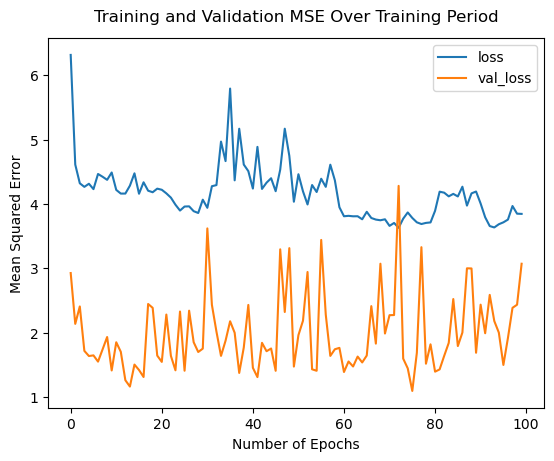

In [85]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation MSE Over Training Period", pad=12);

### Accuracy

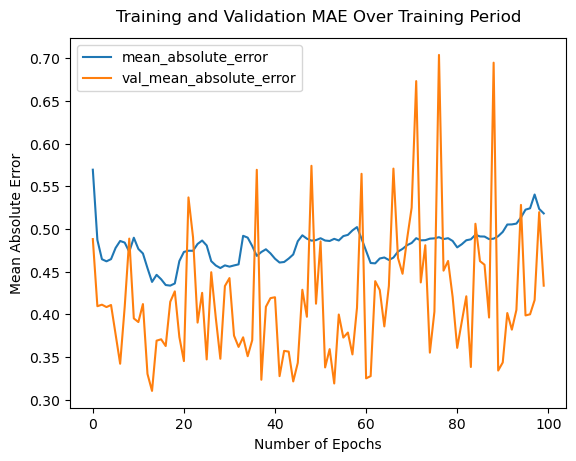

In [86]:
model_df[['mean_absolute_error', 'val_mean_absolute_error']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Training and Validation MAE Over Training Period", pad=12);

### Theory vs Predict

r: 0.98033, st_er: 0.000460
y = 0.97*x + -0.0149


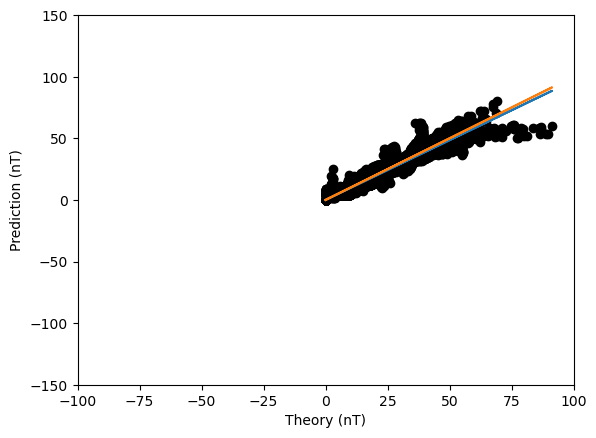

In [15]:
x = y_test.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred,  color='black')
plt.axis([-100,100, -150, 150])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

In [16]:
test_pred

array([[-0.0586853 ],
       [-0.0586853 ],
       [-0.0586853 ],
       ...,
       [-0.0586853 ],
       [-0.05868673],
       [-0.05868673]], dtype=float32)

# Output data

In [ ]:
test_pred = model.predict(X1_pred)

In [ ]:
df_test

In [ ]:
df_test['predict'] = test_pred

In [ ]:
np.savetxt(img_path+"nn_32to38_erode_mae.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
df_test

# Nonzero 32 to 38

In [86]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [87]:
shape = (len(X_train[0]),)
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=shape)) 
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='RMSprop', loss='mse', metrics=["mse"])

In [88]:
checkpointer = ModelCheckpoint(model_path+'best_model_nn_neg_erode_nonzero_2.h5', verbose=1, save_best_only=True)

In [90]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=[X_test, y_test],  callbacks=[checkpointer])

Epoch 1/100
18358/18388 [============================>.] - ETA: 0s - loss: 32.6103 - mse: 32.6103
Epoch 1: val_loss did not improve from 20.02054
18388/18388 [==============================] - 18s 970us/step - loss: 32.6110 - mse: 32.6110 - val_loss: 25.1229 - val_mse: 25.1229
Epoch 2/100
18349/18388 [============================>.] - ETA: 0s - loss: 32.6983 - mse: 32.6983
Epoch 2: val_loss did not improve from 20.02054
18388/18388 [==============================] - 19s 1ms/step - loss: 32.6943 - mse: 32.6943 - val_loss: 23.0666 - val_mse: 23.0666
Epoch 3/100
18357/18388 [============================>.] - ETA: 0s - loss: 32.5500 - mse: 32.5500
Epoch 3: val_loss did not improve from 20.02054
18388/18388 [==============================] - 18s 967us/step - loss: 32.5476 - mse: 32.5476 - val_loss: 26.2053 - val_mse: 26.2053
Epoch 4/100
18360/18388 [============================>.] - ETA: 0s - loss: 32.6201 - mse: 32.6201
Epoch 4: val_loss did not improve from 20.02054
18388/18388 [=========

Epoch 30/100
18377/18388 [============================>.] - ETA: 0s - loss: 31.5653 - mse: 31.5653
Epoch 30: val_loss did not improve from 18.73380
18388/18388 [==============================] - 18s 962us/step - loss: 31.5628 - mse: 31.5628 - val_loss: 35.2510 - val_mse: 35.2510
Epoch 31/100
18370/18388 [============================>.] - ETA: 0s - loss: 31.5462 - mse: 31.5462
Epoch 31: val_loss did not improve from 18.73380
18388/18388 [==============================] - 18s 1ms/step - loss: 31.5480 - mse: 31.5480 - val_loss: 34.0333 - val_mse: 34.0333
Epoch 32/100
18376/18388 [============================>.] - ETA: 0s - loss: 31.5565 - mse: 31.5565
Epoch 32: val_loss did not improve from 18.73380
18388/18388 [==============================] - 17s 945us/step - loss: 31.5559 - mse: 31.5559 - val_loss: 25.8840 - val_mse: 25.8840
Epoch 33/100
18343/18388 [============================>.] - ETA: 0s - loss: 31.5750 - mse: 31.5750
Epoch 33: val_loss did not improve from 18.73380
18388/18388 [=

Epoch 59/100
18347/18388 [============================>.] - ETA: 0s - loss: 31.5414 - mse: 31.5414
Epoch 59: val_loss did not improve from 17.66908
18388/18388 [==============================] - 17s 905us/step - loss: 31.5383 - mse: 31.5383 - val_loss: 25.4394 - val_mse: 25.4394
Epoch 60/100
18367/18388 [============================>.] - ETA: 0s - loss: 31.4858 - mse: 31.4858
Epoch 60: val_loss did not improve from 17.66908
18388/18388 [==============================] - 16s 891us/step - loss: 31.4822 - mse: 31.4822 - val_loss: 26.5190 - val_mse: 26.5190
Epoch 61/100
18385/18388 [============================>.] - ETA: 0s - loss: 31.5191 - mse: 31.5191
Epoch 61: val_loss did not improve from 17.66908
18388/18388 [==============================] - 17s 902us/step - loss: 31.5185 - mse: 31.5185 - val_loss: 24.3970 - val_mse: 24.3970
Epoch 62/100
18337/18388 [============================>.] - ETA: 0s - loss: 31.5976 - mse: 31.5976
Epoch 62: val_loss did not improve from 17.66908
18388/18388 

Epoch 88/100
18384/18388 [============================>.] - ETA: 0s - loss: 32.0034 - mse: 32.0034
Epoch 88: val_loss did not improve from 17.31375
18388/18388 [==============================] - 18s 964us/step - loss: 32.0007 - mse: 32.0007 - val_loss: 23.4034 - val_mse: 23.4034
Epoch 89/100
18365/18388 [============================>.] - ETA: 0s - loss: 31.6484 - mse: 31.6484
Epoch 89: val_loss did not improve from 17.31375
18388/18388 [==============================] - 18s 973us/step - loss: 31.6526 - mse: 31.6526 - val_loss: 32.3839 - val_mse: 32.3839
Epoch 90/100
18361/18388 [============================>.] - ETA: 0s - loss: 31.5739 - mse: 31.5739
Epoch 90: val_loss did not improve from 17.31375
18388/18388 [==============================] - 17s 930us/step - loss: 31.5742 - mse: 31.5742 - val_loss: 25.0730 - val_mse: 25.0730
Epoch 91/100
18388/18388 [==============================] - ETA: 0s - loss: 31.5703 - mse: 31.5703
Epoch 91: val_loss did not improve from 17.31375
18388/18388 

In [91]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
print(mae(train_pred, y_train))
print(mape(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))
print(mae(test_pred, y_test))
print(mape(test_pred, y_test))

36775/36775 [==============================] - 24s 658us/step
30.476519156882194
2.9888840029474215
0.9945971937702631
1694/1694 [==============================] - 1s 649us/step
31.51437847517614
2.846365156283156
0.526784081363091


In [92]:
model.evaluate(X_test, y_test)

1694/1694 [==============================] - 1s 744us/step - loss: 31.5144 - mse: 31.5144


[31.514373779296875, 31.514373779296875]

In [93]:
np.corrcoef(test_pred.flatten(), y_test)

array([[1.        , 0.93883218],
       [0.93883218, 1.        ]])

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 20        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [95]:
history.history

{'loss': [32.611026763916016,
  32.694339752197266,
  32.54764938354492,
  32.610023498535156,
  32.35432052612305,
  32.42671203613281,
  32.3262825012207,
  32.191383361816406,
  32.145259857177734,
  32.15718460083008,
  32.10895919799805,
  32.04167175292969,
  32.126651763916016,
  32.053897857666016,
  31.969942092895508,
  31.859725952148438,
  31.86924934387207,
  31.82591438293457,
  31.74982261657715,
  31.671247482299805,
  31.618623733520508,
  31.63079833984375,
  31.568449020385742,
  31.58173179626465,
  31.600461959838867,
  31.594757080078125,
  31.58447265625,
  31.552968978881836,
  31.617328643798828,
  31.562755584716797,
  31.548032760620117,
  31.555912017822266,
  31.573469161987305,
  31.530031204223633,
  31.565637588500977,
  31.582334518432617,
  31.557701110839844,
  31.565364837646484,
  31.509464263916016,
  31.529300689697266,
  31.557170867919922,
  31.533138275146484,
  31.569313049316406,
  31.53692626953125,
  31.565645217895508,
  31.54429817199707,

## Plot

### Loss function (MSE)

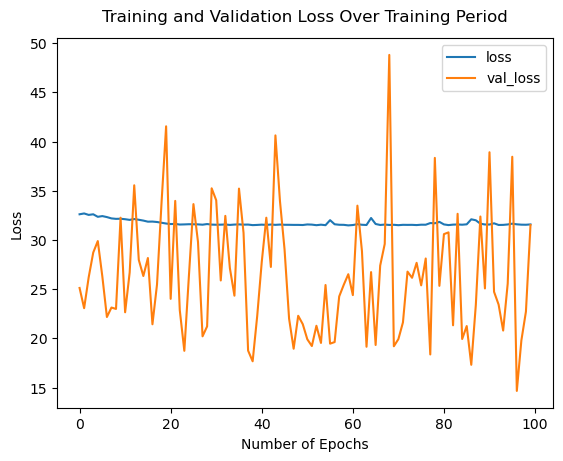

In [96]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Theory vs Predict

In [248]:
test_pred = model.predict(X4_pred1)

847/847 [==============================] - 1s 733us/step


In [249]:
y4_pred1.shape

(27096,)

r: 0.72970, st_er: 0.002595
y = 0.4558*x + -3.8685


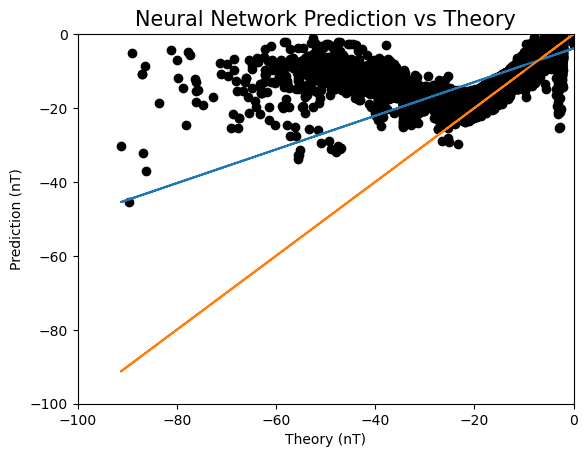

In [262]:
x = y4_pred1.flatten()
y = test_pred.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y4_pred1, test_pred,  color='black')
plt.axis([-100,0, -100, 0])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
plt.title("Neural Network Prediction vs Theory", fontsize=15)
# print(r, st_er)
print("r: {:.5f}, st_er: {:.6f}".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

# Output data

In [251]:
df4_pred1['predict'] = test_pred

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_1981/2688473004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_pred1['predict'] = test_pred


In [252]:
df4_pred1

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory,predict
2017384,36,6,8,33,40,2,1,-298.687897,-313.737274,-312.011200,-6.323732,-8.311440
2017385,36,6,8,33,41,2,1,-488.780823,-502.790314,-501.399567,-5.692159,-7.420189
2017386,36,6,8,33,42,2,1,-700.522400,-713.198364,-711.765076,-5.156662,-6.536915
2017387,36,6,8,33,43,2,1,-911.637207,-924.472595,-923.017944,-4.694756,-6.142650
2017423,36,6,8,34,15,2,1,-1489.757202,-1499.828979,-1503.126099,-3.883065,-1.716156
...,...,...,...,...,...,...,...,...,...,...,...,...
2128148,36,6,35,36,20,2,1,-628.576294,-640.380493,-640.784180,-6.022675,-5.662175
2128149,36,6,35,36,21,2,1,-478.441254,-491.319244,-490.660767,-6.719324,-6.771347
2128150,36,6,35,36,22,2,1,-340.263275,-354.678894,-352.521301,-7.573551,-8.184930
2128151,36,6,35,36,23,2,1,-214.553329,-230.615768,-227.110611,-8.658540,-9.546820


In [253]:
df1_test1

,exp,mini_exp,i,j,k,amp,neg,mean0,mean1,mean2,theory,predict
1982464,36,6,0,0,0,2,1,0.0,0.0,0.0,0.0,0.0
1982465,36,6,0,0,1,2,1,0.0,0.0,0.0,0.0,0.0
1982466,36,6,0,0,2,2,1,0.0,0.0,0.0,0.0,0.0
1982467,36,6,0,0,3,2,1,0.0,0.0,0.0,0.0,0.0
1982468,36,6,0,0,4,2,1,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2162683,36,6,43,63,59,2,1,0.0,0.0,0.0,0.0,0.0
2162684,36,6,43,63,60,2,1,0.0,0.0,0.0,0.0,0.0
2162685,36,6,43,63,61,2,1,0.0,0.0,0.0,0.0,0.0
2162686,36,6,43,63,62,2,1,0.0,0.0,0.0,0.0,0.0


In [254]:
df1_test1['predict'] = 0.00

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_1981/3425859553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_test1['predict'] = 0.00


In [255]:
df_out = df1_test1[['i', 'j', 'k', 'predict']]
df_pre = df4_pred1[['i', 'j', 'k',  'predict']]

In [256]:
df_out

,i,j,k,predict
1982464,0,0,0,0.0
1982465,0,0,1,0.0
1982466,0,0,2,0.0
1982467,0,0,3,0.0
1982468,0,0,4,0.0
...,...,...,...,...
2162683,43,63,59,0.0
2162684,43,63,60,0.0
2162685,43,63,61,0.0
2162686,43,63,62,0.0


In [257]:
for x in range(len(df_pre)):
    i = df_pre.iloc[x, :]['i'].astype(int)
    j = df_pre.iloc[x, :]['j'].astype(int)
    k = df_pre.iloc[x, :]['k'].astype(int)
#     neg = df_pre.iloc[x, :]['neg'].astype(int)
    pred = df_pre.iloc[x, :]['predict']
    idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k)].index
#     idx = df_out[(df_out['i']==i) & (df_out['j']==j) & (df_out['k']==k) & (df_out['neg']==neg)].index
    df_out.loc[idx, 'predict']= pred

In [258]:
df_out[(df_out['i']==30) & (df_out['j']==32) & (df_out['k']==40)]

,i,j,k,predict
2107432,30,32,40,-11.900719


In [259]:
np.savetxt(img_path+"nn_neg_erode_nonzero_neg_2.txt", df_out[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
df_pos = df_out[df_out['neg']==0]
df_neg = df_out[df_out['neg']==1]

In [ ]:
np.savetxt(img_path+"nn_neg_erode_nonzero_pos_2.txt", df_pos[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")
np.savetxt(img_path+"nn_neg_erode_nonzero_neg_2.txt", df_neg[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")